In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('flats_cleaned.csv')
df.head()

,price,district,rooms,floor,metro,total_area,kitchen_area,floor_total
0,26000,Солом'янський,2,14.0,1,60.0,15.0,25.0
1,95750,Печерський,3,10.0,1,131.0,15.0,25.0
2,57450,Печерський,2,2.0,1,87.0,17.0,23.0
3,8000,Дарницький,1,3.0,1,40.0,9.0,16.0
4,15000,Дарницький,1,15.0,1,38.0,16.0,25.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14946 entries, 0 to 14945
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         14946 non-null  int64  
 1   district      14946 non-null  object 
 2   rooms         14946 non-null  int64  
 3   floor         14946 non-null  float64
 4   metro         14946 non-null  int64  
 5   total_area    14946 non-null  float64
 6   kitchen_area  14946 non-null  float64
 7   floor_total   14913 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 934.3+ KB


## Summary statistics for numeric features

In [4]:
df.describe()

,price,rooms,floor,metro,total_area,kitchen_area,floor_total
count,14946.000000,14946.000000,14946.000000,14946.000000,14946.000000,14946.000000,14913.000000
mean,36732.171484,2.210157,9.029774,0.401244,80.100709,15.899589,16.225910
std,41373.556169,1.040012,6.401592,0.490167,52.291409,10.038932,8.210539
min,999.000000,1.000000,1.000000,0.000000,9.000000,1.000000,1.000000
25%,13000.000000,1.000000,4.000000,0.000000,46.000000,9.000000,9.000000
50%,22980.000000,2.000000,7.000000,0.000000,63.000000,14.000000,16.000000
75%,45803.000000,3.000000,13.000000,1.000000,98.000000,20.000000,24.000000
max,459600.000000,6.000000,44.000000,1.000000,500.000000,100.000000,48.000000


## Target feature

<Axes: >

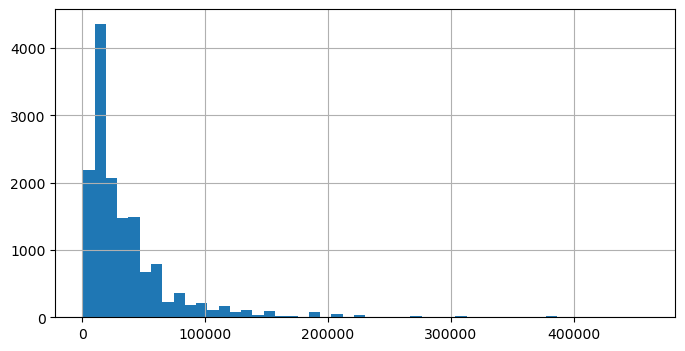

In [9]:
plt.figure(figsize=(8, 4))
df.price.hist(bins=50)

### Categorical features

In [11]:
categorical = ['district', 'metro']
numerical = ['rooms', 'floor', 'total_area', 'kitchen_area', 'floor_total']

Text(0.5, 1.0, 'Number of flats by district')

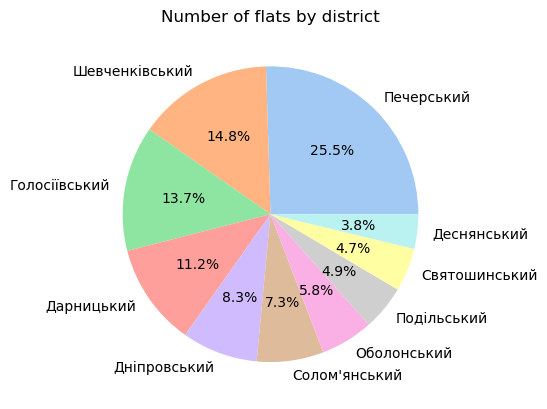

In [18]:
colors = sns.color_palette('pastel')[0:10]

plt.pie(x =df.district.value_counts(), labels=df.district.value_counts().index, colors =colors,   autopct='%1.1f%%')

plt.title("Number of flats by district")

Text(0.5, 1.0, 'Number of flats by metro')

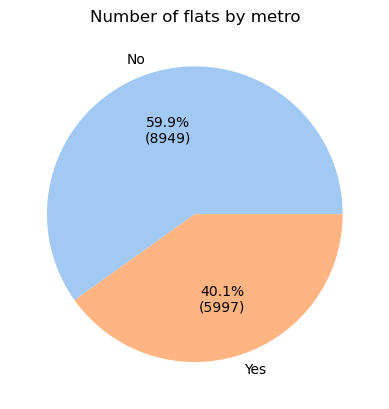

In [19]:
colors = sns.color_palette('pastel')[0:2]

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

plt.pie(x =df.metro.value_counts(), labels=["No", "Yes"], colors =colors, autopct=autopct_format(df.district.value_counts()))

plt.title("Number of flats by metro")

### Numerical features

Text(0.5, 1.0, 'Number of flats by rooms amount')

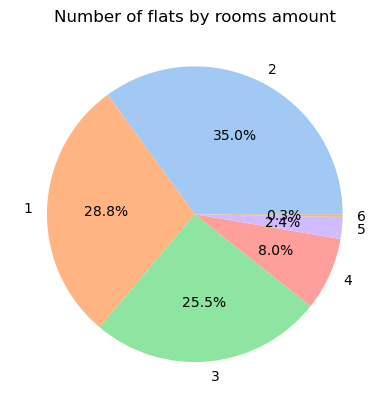

In [21]:
colors = sns.color_palette('pastel')[0:6]
plt.pie(x =df.rooms.value_counts(), labels=df.rooms.value_counts().index, colors =colors,  autopct='%1.1f%%')

plt.title("Number of flats by rooms amount")

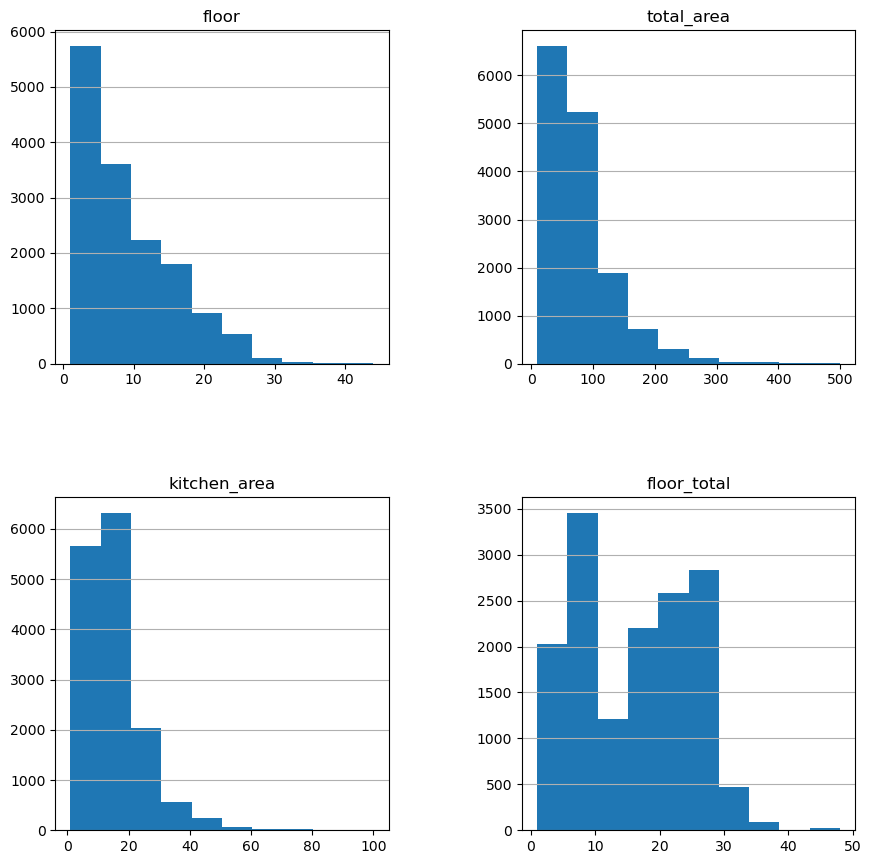

In [22]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
for i in range(1, len(numerical)):
    plt.subplot(2, 2, i)
    plt.title(numerical[i])
    df[numerical[i]].hist()
    
    plt.grid(axis='x')

## Features dependencies

In [23]:
order = df.groupby(by='district').price.median().sort_values(ascending=False)
order.index

Index(['Печерський', 'Шевченківський', 'Голосіївський', 'Подільський',
       'Дарницький', 'Солом'янський', 'Оболонський', 'Дніпровський',
       'Святошинський', 'Деснянський'],
      dtype='object', name='district')

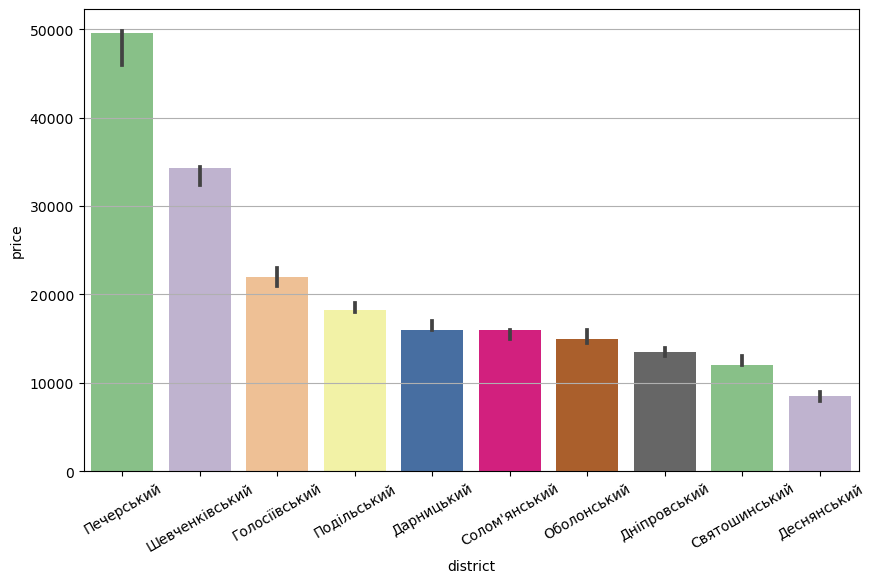

In [24]:
order = df.groupby(by='district').price.median().sort_values(ascending=False)

plt.figure(figsize = (10, 6))
g = sns.barplot(x='district', y='price', estimator=np.median, data=df, order = order.index, palette='Accent')
plt.grid(axis='y')
ticks = plt.xticks(rotation=30)

<Axes: xlabel='metro', ylabel='price'>

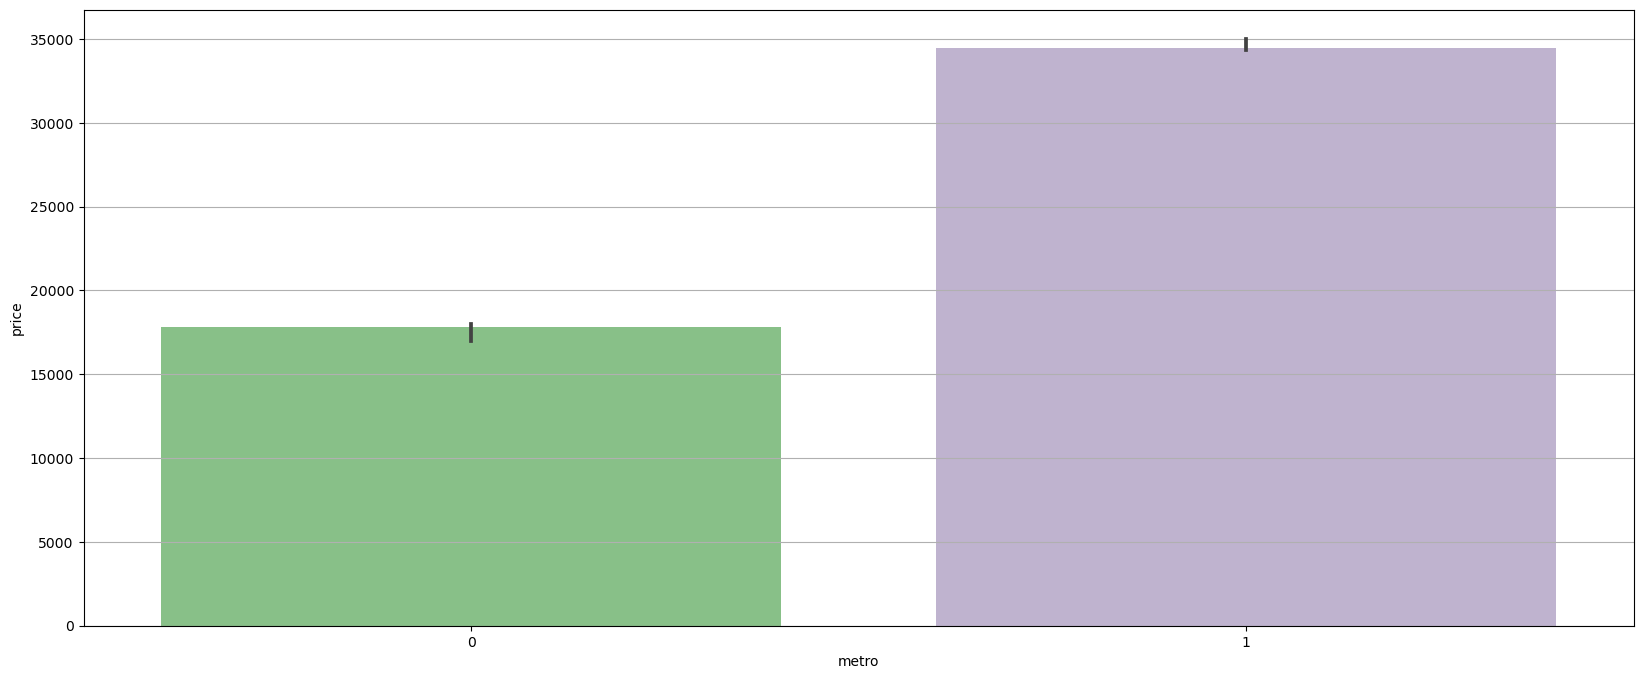

In [25]:
plt.figure(figsize=(20, 8))
plt.grid(axis='y')
sns.barplot(x='metro', y= 'price', data=df, estimator=np.median, palette='Accent')

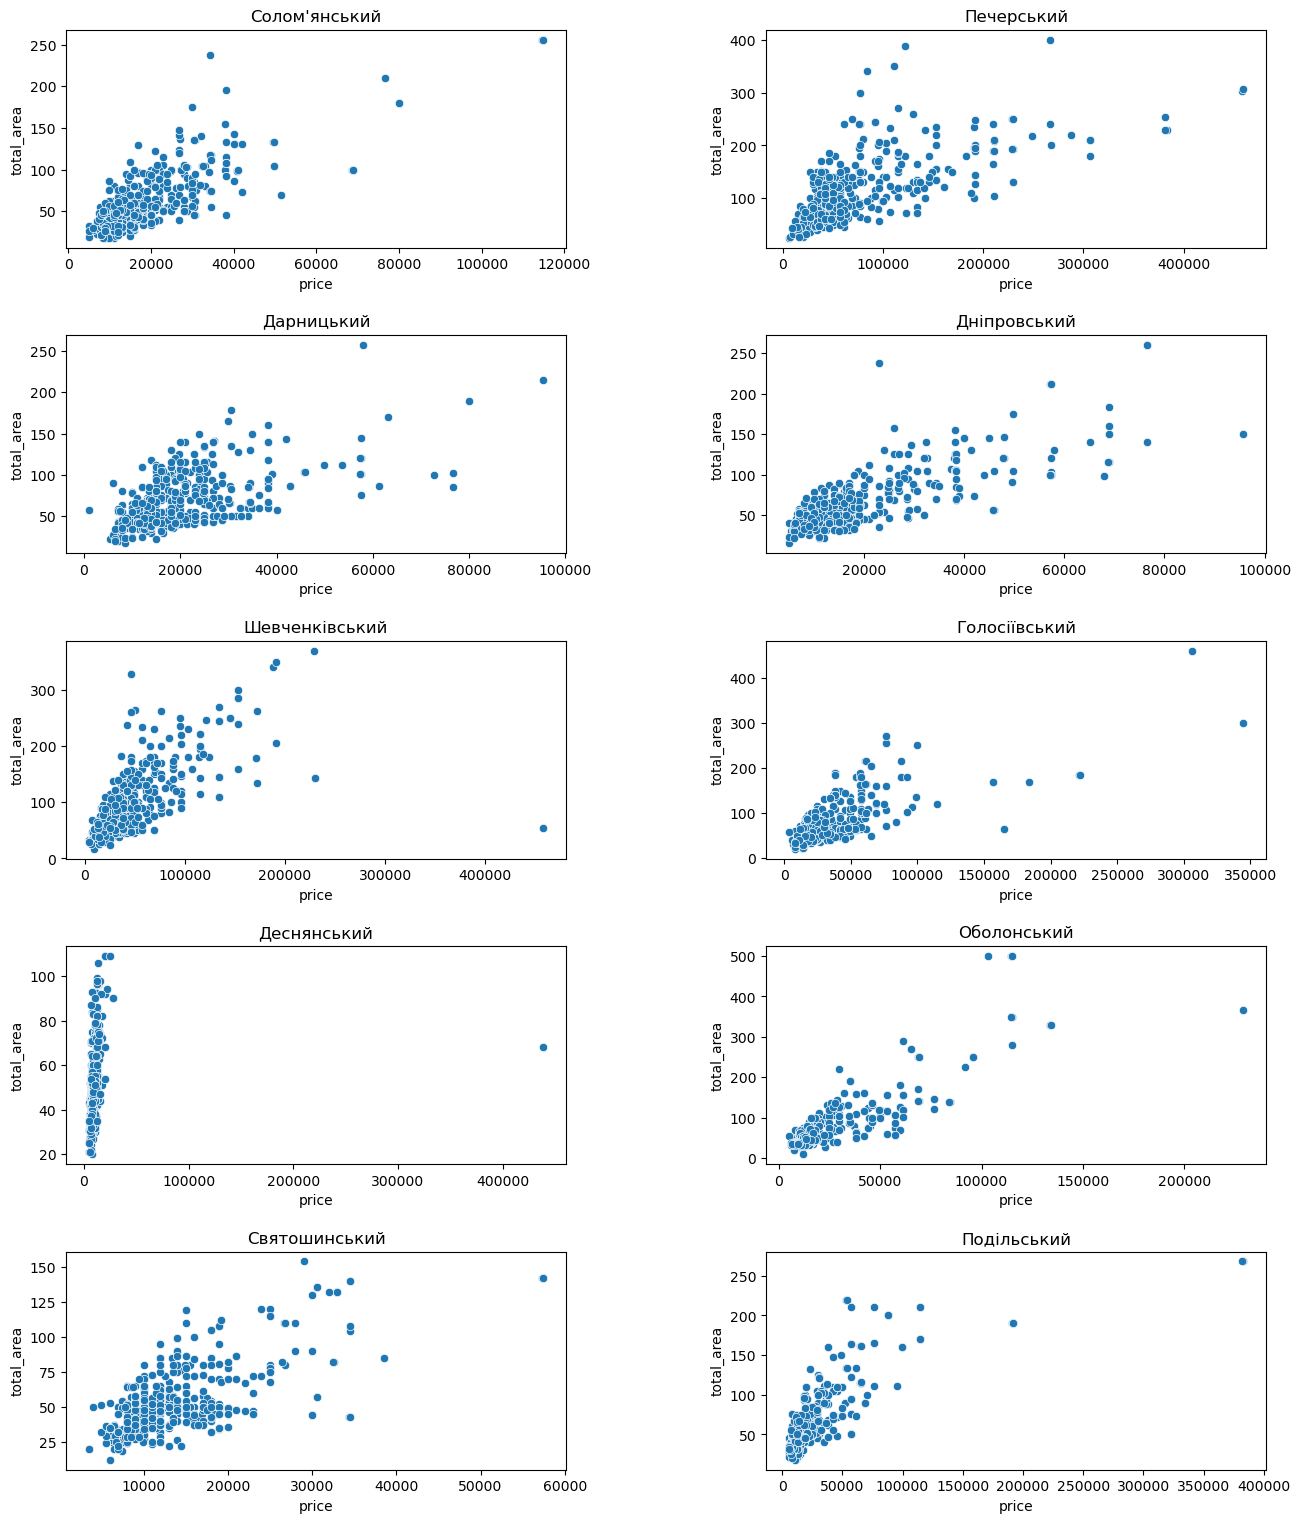

In [30]:
districts = df.district.unique()
plt.figure(figsize=(15, 18))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
for i in range(0, len(districts)):
    plt.subplot(5, 2, i+1)
    plt.title(districts[i])
    sns.scatterplot(x='price', y ='total_area', data = df[df.district==districts[i]].sample(500))


<Axes: xlabel='rooms', ylabel='price'>

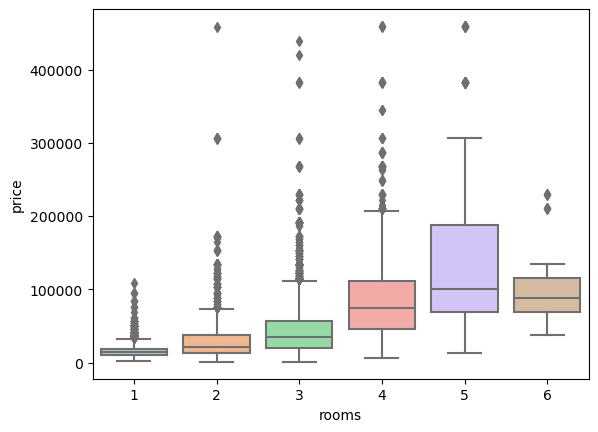

In [27]:
sns.boxplot(x='rooms', y='price', palette='pastel', data=df)

### Correlation

<Axes: >

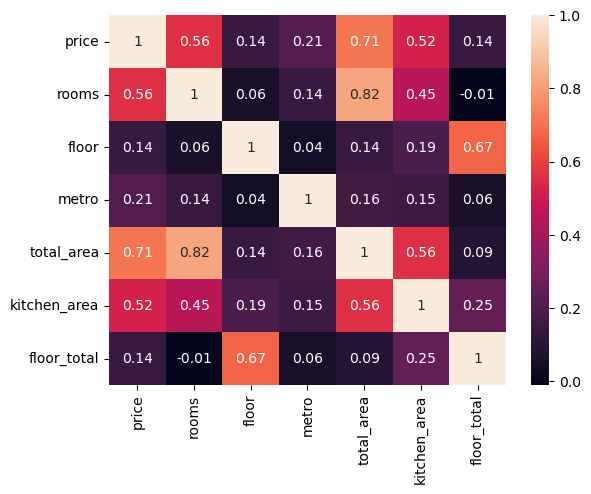

In [28]:
corr_matrix = df.corr(numeric_only=True).round(2)
sns.heatmap(corr_matrix, annot=True)